In [23]:
import pandas as pd 
import matplotlib.pyplot as plt 
df=pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


remove outlier

In [24]:
q1=df['age'].quantile(0.25)
print("q1",q1)
q3=df['age'].quantile(0.75)
print("q3",q3)
iqr=q3-q1
print("iqr",iqr)
lower_limit=q1-1.5*iqr
print("lower limit=",lower_limit)
upper_limit=q3+1.5*iqr
print("upper limit",upper_limit)
outlier=df[(df['age']<lower_limit) | (df['age']>upper_limit)]
print(outlier)

q1 22.0
q3 55.0
iqr 33.0
lower limit= -27.5
upper limit 104.5
    age  bought_insurance
39  128                 1
40  115                 1


In [25]:
df.describe()

,age,bought_insurance
count,41.000000,41.000000
mean,42.121951,0.536585
std,25.459964,0.504854
min,10.000000,0.000000
25%,22.000000,0.000000
50%,45.000000,1.000000
75%,55.000000,1.000000
max,128.000000,1.000000


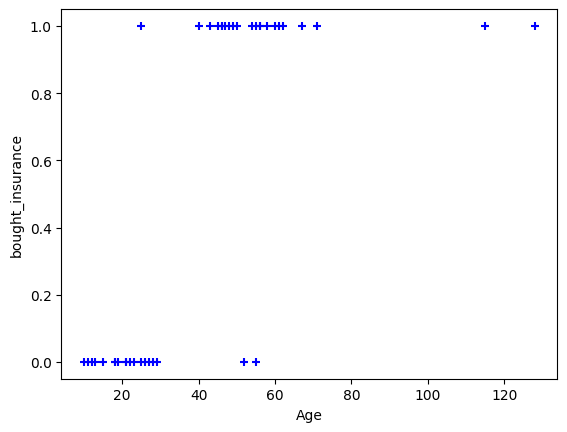

In [26]:
plt.scatter(df['age'],df['bought_insurance'],marker="+",color='blue')
plt.xlabel("Age")
plt.ylabel("bought_insurance")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df['bought_insurance'],test_size=0.1)


In [28]:
x_test

,age
18,19
40,115
15,55
32,21
23,45


In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [30]:
import numpy as np
model.predict(x_test)


array([0, 1, 1, 0, 1], dtype=int64)

In [31]:
model.score(x_test,y_test)

1.0

we can also calculate of prob value of no and yes 

In [32]:
model.predict_proba(x_test)

array([[9.40560772e-01, 5.94392284e-02],
       [1.23500464e-05, 9.99987650e-01],
       [7.50046746e-02, 9.24995325e-01],
       [9.21906370e-01, 7.80936303e-02],
       [2.59742972e-01, 7.40257028e-01]])

In [33]:
import joblib 
joblib.dump(model,"LogisticRegression_model")

['LogisticRegression_model']

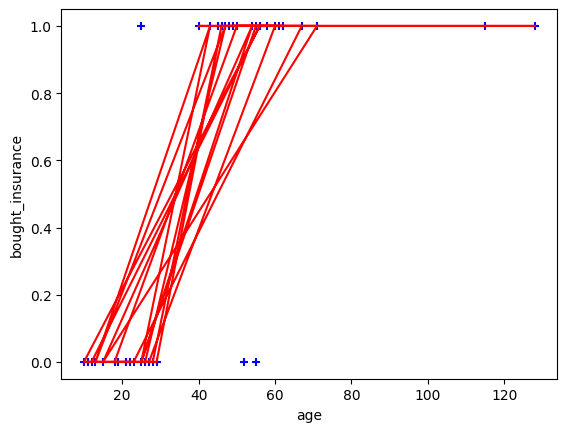

In [34]:
plt.scatter(df['age'],df['bought_insurance'],marker="+",color="blue")
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel("age")
plt.ylabel("bought_insurance")
plt.show()